# Classification Exercises


# Data Acquistion

In [ ]:
import pandas as pd
import numpy as np
import os

# visualize
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(11, 9))
plt.rc('font', size=13)

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

# acquire
from env import host, user, password
from pydataset import data





### 1. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.
- print the first 3 rows
- print the number of rows and columns (shape)
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [ ]:
# Print the first 3 rows
df_iris = data('iris')
print(df_iris.head(3))



In [ ]:
# Print the number of rows and columns (shape)
print(df_iris.shape)



In [ ]:
# Print the column names
print(df_iris.columns)



In [ ]:
# Print the data type of each column
print(df_iris.dtypes)



In [ ]:
# Print the summary statistics for each of the numeric variables. 
# Would you recommend rescaling the data based on these statistics?
print(df_iris.describe().T)



### 2. Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.
- assign the first 100 rows to a new dataframe, df_excel_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables.

In [ ]:
# Assign the first 100 rows to a new dataframe, df_excel_sample
telco = pd.read_excel('Spreadsheets_Exercises.xlsx', sheet_name='Table1_CustDetails')
df_excel_sample = telco.head(101)
df_excel_sample



In [ ]:
# Print the number of rows of your original dataframe

print(telco.shape)



In [ ]:
# Print the first 5 column names
print(df_excel_sample.columns[:5])



In [ ]:
# Print the column names that have a data type of object
df_excel_sample.select_dtypes(include='object').columns




In [ ]:
# Compute the range for each of the numeric variables.
df_numeric = df_excel_sample.select_dtypes(include='float64')
df_summary= df_numeric.describe().T
df_summary
df_summary['range'] = df_summary['max'] - df_summary['min']
df_summary



### 3. Read the data from this google sheet into a dataframe, df_google
- print the first 3 rows
- print the number of rows and columns
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables
- print the unique values for each of your categorical variables

In [ ]:
# Print the first 3 rows

sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
csv_export_url
df_google = pd.read_csv(csv_export_url)
df_google.head(3)




In [ ]:
# print the number of rows and columns
df_google.shape



In [ ]:
# print the column names
df_google.columns

In [ ]:
# print the data type of each column
df_google.dtypes

In [ ]:
# print the summary statistics for each of the numeric variables
df_numeric = df_google.select_dtypes(include=('float64', 'int64'))
df_numeric.describe()

In [ ]:
# print the unique values for each of your categorical variables
pd.unique(df_google[['Survived', 'Pclass','Sex', 'Embarked']].values.ravel('K'))



In [ ]:
#review:
for col in df_google:
    if df_google[col].dtypes == 'object':
        print(f'{col} has {df_google[col].nunique()} unique values.')



In [ ]:
df_google.Survived.value_counts(dropna=False)

In [ ]:
df_google.Pclass.value_counts(dropna=False)

In [ ]:
df_google.Sex.value_counts(dropna=False)

In [ ]:
df_google.Embarked.value_counts(dropna=False)

# Prepare Data

### 1. Use the function defined in acquire.py to load the iris data.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import acquire

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = acquire.get_iris_data(cached=False)

In [ ]:
df

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.describe()

### 2. Drop the species_id and measurement_id columns.

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df = df.drop(['species_id'], axis=1)
#df.drop(columns=['species_is'], inplace=True)

In [ ]:
df

### 3. Rename the species_name column to just species.



In [ ]:
df.rename(columns={"species_name": "species"}, inplace=True)

In [ ]:
df

### 4. Create dummy variables of the species name.


In [ ]:
dummies = pd.get_dummies(df[['species']], drop_first=True) #dont have nan or null so drop false will default to false
dummies
#double brackets to call as a df

In [ ]:
df = pd.concat([df, dummies], axis=1)

In [ ]:
df

### 5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [ ]:
#def clean_iris(df):
 #   '''
  #  prep_iris will take a dataframe acquired as df and remove columns that are:
  #  duplicates,
   # drop unessential columns,
    #rename columns,
    #and create dummies
    
    #return: clean dataframe
   # '''
   # df.drop_duplicates(inplace=True)
   # df.drop(['species_id'], axis=1)
   # df.rename(columns={"species_name": "species"}, inplace=True)
   # dummies = pd.get_dummies(df[['species']], drop_first=True)
   # return pd.concat([df, dummies], axis=1)

In [ ]:
#def prep_iris(df): #when we are translating to its own script, call it as an argument
   # '''
    
    #prep_iris will take one argument df, a df, anticipated to be iris df
    #and will remove species id,
    #rename species name to species,
    #and encode species into two columns
   # perform a train, validate, test split
    
    #return: threee pandas dataframes: train validate, test
    #'''
    #df = clean_iris(df)
    #train_validate, test = train_test_split(df, test_size=0.2, random_state=123, stratify=df.species)
    #train, validate = train_test_split(train_validate, train_size=0.3, random_state=123, stratify=train_validate.species)
    #return train, validate, test

    


In [ ]:
import prepare

In [ ]:
#start from scratch:
df = acquire.get_iris_data()

In [ ]:
df.head()

In [ ]:
train, validate, test = prepare.prep_iris(df)

In [ ]:
train.head()

# Exploratory Analysis Notes

- Are you doing any modeling?
- when we explore data we will be modeling later:
- split our data into train, validate, test
- then we explore the heck out of "train"
- if our job task is only to produce understanding (no modeling, no ML)
- this is called analytics
- analytics == stats tools on the entire population


# Exploratory Analysis Exercises


In [2]:
from prepare import clean_iris
from prepare import train_validate_test_split
from acquire import get_iris_data

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Split your data into train, validate, and test samples.

In [3]:
iris = get_iris_data()
iris.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [4]:
df = clean_iris(iris)

In [5]:
df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


In [6]:
train, validate, test = train_validate_test_split(df, seed=123)

In [9]:

train.shape, validate.shape, test.shape

((84, 7), (36, 7), (30, 7))

In [10]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
79,versicolor,5.7,2.6,3.5,1.0,1,0
36,setosa,5.5,3.5,1.3,0.2,0,0
133,virginica,6.3,2.8,5.1,1.5,0,1
95,versicolor,5.7,3.0,4.2,1.2,1,0
18,setosa,5.7,3.8,1.7,0.3,0,0


### 2. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [13]:
train = train.drop('species_versicolor',axis=1)
train = train.drop('species_virginica',axis=1)
train['petal_area'] = train.petal_length * train.petal_width
train['sepal_area'] = train.sepal_length * train.sepal_width


In [14]:
train_melt = train.melt(id_vars='species',
           var_name='measurement')
train_melt.head()

,species,measurement,value
0,versicolor,sepal_length,5.7
1,setosa,sepal_length,5.5
2,virginica,sepal_length,6.3
3,versicolor,sepal_length,5.7
4,setosa,sepal_length,5.7


In [15]:
train_melt = train_melt[((train_melt.measurement == 'sepal_length') | (train_melt.measurement == 'sepal_width') | (train_melt.measurement == 'petal_length') | (train_melt.measurement == 'petal_width'))]
train_melt.head()

,species,measurement,value
0,versicolor,sepal_length,5.7
1,setosa,sepal_length,5.5
2,virginica,sepal_length,6.3
3,versicolor,sepal_length,5.7
4,setosa,sepal_length,5.7


<AxesSubplot:xlabel='measurement', ylabel='value'>

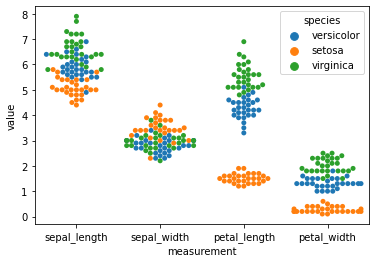

In [16]:
sns.swarmplot(x=train_melt.measurement, y=train_melt.value, hue = 'species', data=train_melt)

### 3. Create 4 subplots (2 rows x 2 columns) of scatterplots.
- sepal_length x sepal_width
- petal_length x petal_width
- sepal_area x petal_area
- sepal_length x petal_length

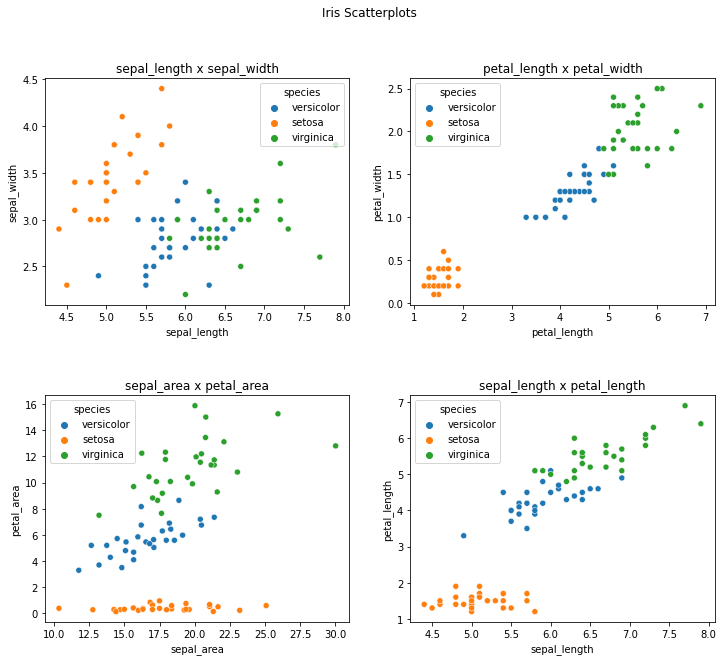

In [25]:
#sepal length x sepal width
plt.figure(figsize=(12,10))
plt.suptitle('Iris Scatterplots')

plt.subplot(221)
sns.scatterplot(x=train.sepal_length,y=train.sepal_width,hue=train.species)
plt.title('sepal_length x sepal_width')

plt.subplot(222)
sns.scatterplot(x=train.petal_length,y=train.petal_width,hue=train.species)
plt.title('petal_length x petal_width')

plt.subplot(223)
sns.scatterplot(x=train.sepal_area,y=train.petal_area,hue=train.species)
plt.title('sepal_area x petal_area')

plt.subplot(224)
sns.scatterplot( x=train.sepal_length,y=train.petal_length,hue=train.species)
plt.title('sepal_length x petal_length')

plt.subplots_adjust(hspace=0.4)


### 4. Create a heatmap of each variable layering correlation coefficient on top.

In [27]:
confidence_interval = .95
alpha = 1 - confidence_interval

corr_coefficient = train.corr()
round(corr_coefficient, 2)

,sepal_length,sepal_width,petal_length,petal_width,petal_area,sepal_area
sepal_length,1.00,-0.15,0.87,0.82,0.86,0.62
sepal_width,-0.15,1.00,-0.48,-0.40,-0.34,0.67
petal_length,0.87,-0.48,1.00,0.96,0.95,0.27
petal_width,0.82,-0.40,0.96,1.00,0.98,0.30
petal_area,0.86,-0.34,0.95,0.98,1.00,0.37
sepal_area,0.62,0.67,0.27,0.30,0.37,1.00


<AxesSubplot:>

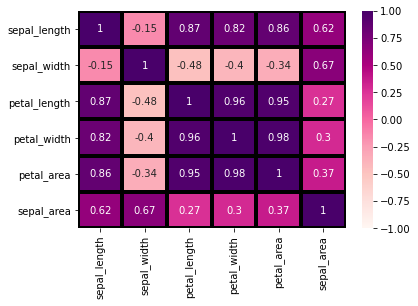

In [34]:
sns.heatmap(corr_coefficient, annot = True, vmin=-1, vmax=1, center= 0, cmap = 'RdPu', linewidths=3, linecolor='black' )

<AxesSubplot:>

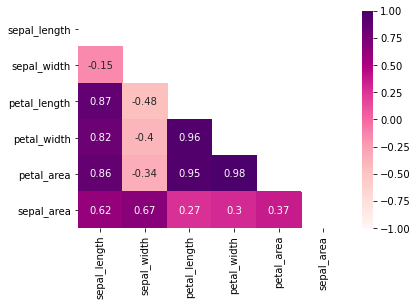

In [37]:
matrix = np.triu(corr_coefficient)
sns.heatmap(corr_coefficient, annot=True, mask=matrix, vmin=-1, vmax=1, center= 0, cmap = 'RdPu' )

### 5. Create a scatter matrix visualizing the interaction of each variable.

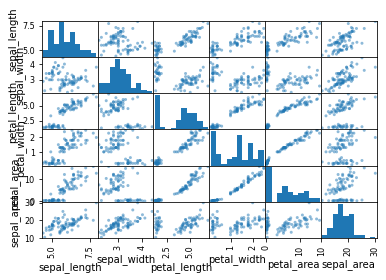

In [41]:
pd.plotting.scatter_matrix(train)
plt.show()

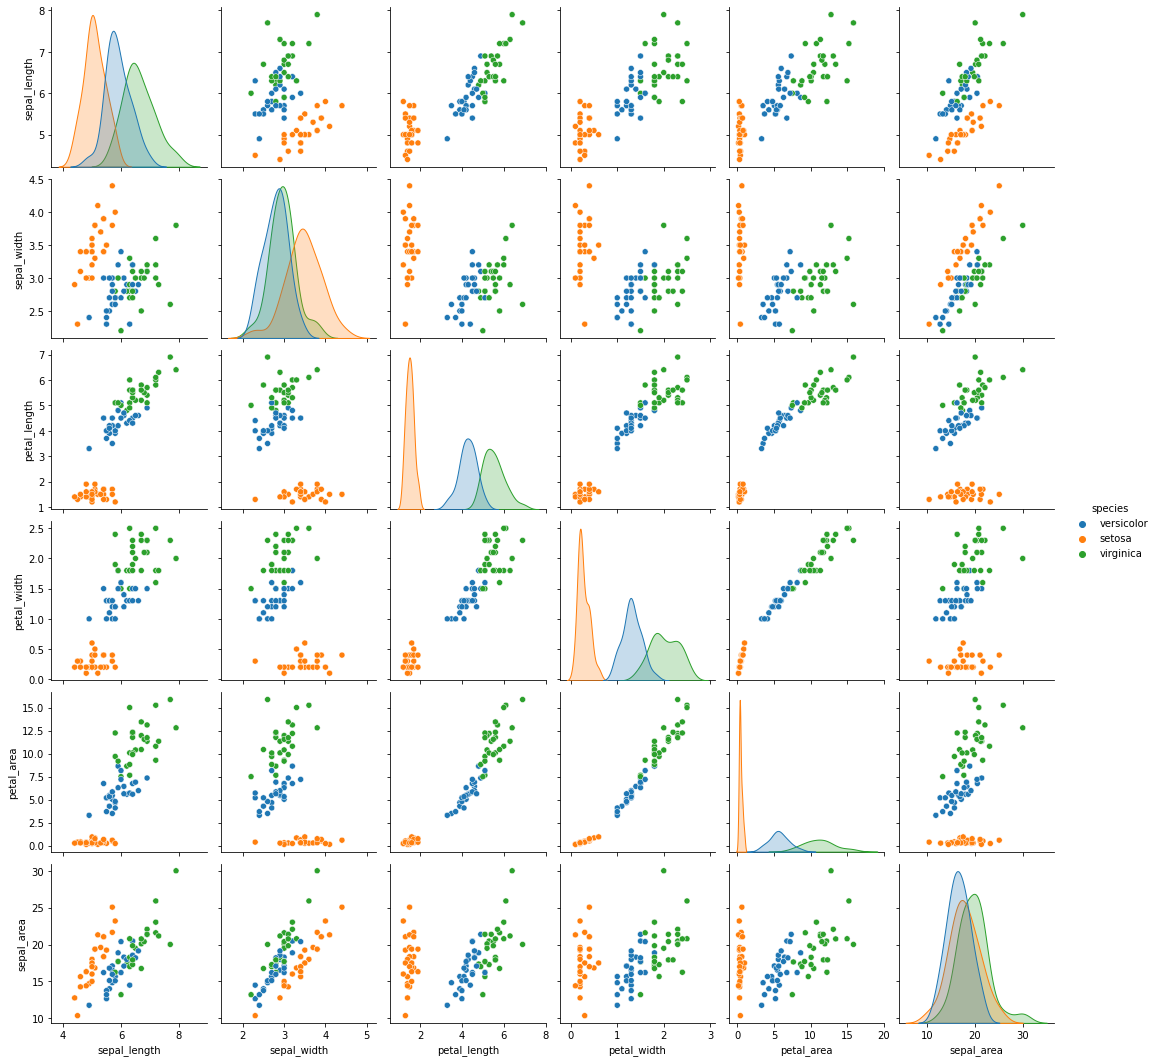

In [42]:

sns.pairplot(train, hue='species')
plt.show()

### 6. Is the sepal length significantly different in virginica compared to versicolor? Run a statistical experiment to test this.
- Make sure to include a null hypothesis, alternative hypothesis, results, and summary.
- What is your takeaway from this statistical testing?

In [ ]:
import scipy.stats as stats


### 7. Create any other visualizations and run any other statistical tests you think will be helpful in exploring this data set.